Load Dataset

In [31]:
# Load Dataset and Explore:
import pandas as pd
df=pd.read_csv("/content/stockholm_transit_delays.csv")
df.head()
df.info()
df['is_delayed'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   route_id        1000 non-null   object 
 1   stop_name       1000 non-null   object 
 2   day_of_week     1000 non-null   object 
 3   scheduled_time  1000 non-null   object 
 4   temperature     1000 non-null   float64
 5   precipitation   1000 non-null   float64
 6   traffic_level   1000 non-null   int64  
 7   is_delayed      1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


,proportion
is_delayed,
0,0.707
1,0.293


Step 2: Preprocess
Encode categorical variables (OneHot/Label Encoding)

Convert scheduled_time to hour

Handle missing or extreme values

In [32]:
print(df.isnull().sum())
df.dropna(inplace=True)
# Encode categorical variables:
x=df.drop('is_delayed',axis=1)
y=df['is_delayed']
x_encoded=pd.get_dummies(x,drop_first=True)
x_encoded.head(10)

route_id          0
stop_name         0
day_of_week       0
scheduled_time    0
temperature       0
precipitation     0
traffic_level     0
is_delayed        0
dtype: int64


,temperature,precipitation,traffic_level,route_id_B72,route_id_T14,route_id_T19,stop_name_Odenplan,stop_name_Slussen,stop_name_T-Centralen,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,scheduled_time_08:00,scheduled_time_12:00,scheduled_time_17:30,scheduled_time_20:00
0,9.1,1.75,3,False,True,False,False,False,True,False,True,False,False,True,False,False,False
1,14.4,1.70,3,False,False,True,False,False,False,False,False,False,True,False,True,False,False
2,10.1,0.13,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,19.1,0.34,2,False,True,False,False,True,False,True,False,False,False,False,False,False,False
4,0.2,0.86,1,False,True,False,False,True,False,False,False,False,False,False,False,True,False
5,6.9,0.24,2,False,False,True,False,True,False,True,False,False,False,False,False,False,True
6,2.6,1.64,3,False,False,False,True,False,False,False,False,True,False,False,True,False,False
7,2.9,1.15,2,False,False,False,False,True,False,True,False,False,False,False,False,False,True
8,3.0,0.09,1,False,True,False,True,False,False,False,True,False,False,False,False,True,False
9,8.8,0.18,1,True,False,False,True,False,False,False,False,False,True,False,False,False,False


EDA

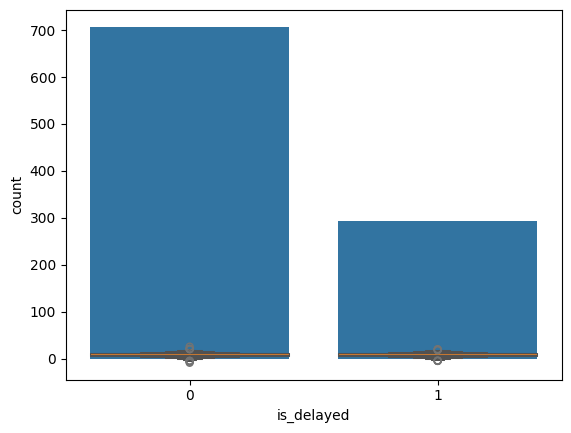

In [33]:
# EDA
# Encode categorical variables(OneHot/Labelencoding)
# Convert schedule time to hrs:
# Handle missing or extreme values:'
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_delayed',data=df)
sns.boxenplot(x='is_delayed',y='temperature',data=df)
plt.savefig('boxenplot.png')
plt.savefig('countplot.png')
plt.show()


Train-Test

In [34]:
# Train-test:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x=df.drop('is_delayed',axis=1)
y=df['is_delayed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [35]:
y=df['is_delayed']
x=df.drop('is_delayed',axis=1)

x_encoded=pd.get_dummies(x,drop_first=True)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42)

Train-Models

In [36]:
# Train Models:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       141
           1       0.18      0.03      0.06        59

    accuracy                           0.67       200
   macro avg       0.44      0.49      0.43       200
weighted avg       0.55      0.67      0.58       200

[[132   9]
 [ 57   2]]


Feature Importance with Barplot

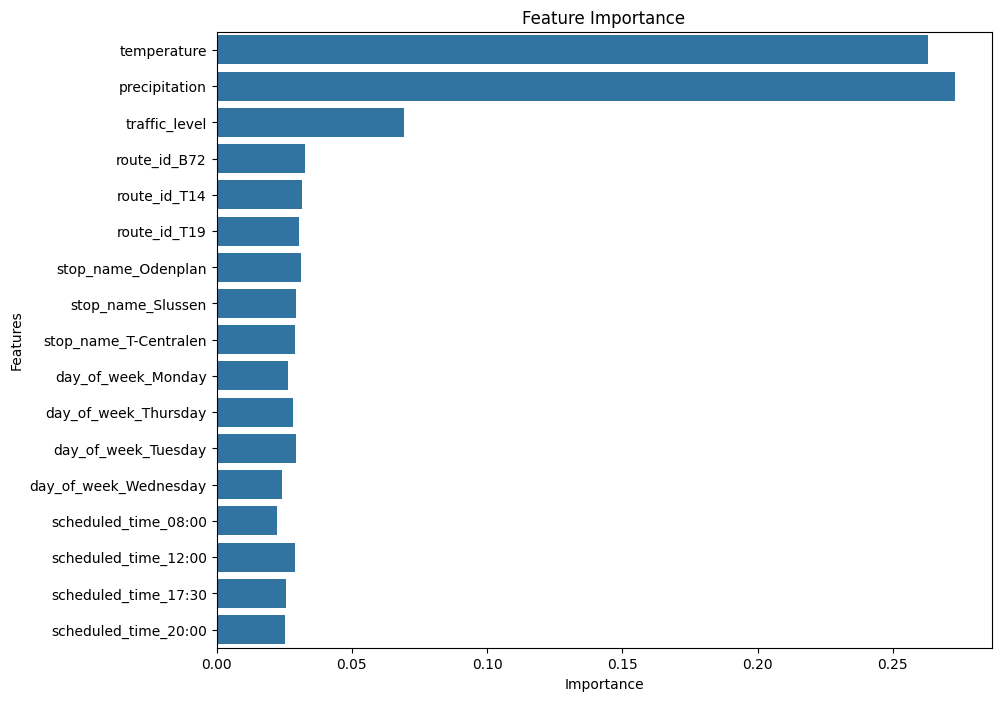

In [37]:
importances=model.feature_importances_
features=x_train.columns
importance_df=pd.DataFrame({'feature':features,'importance':importances})
importance_df.sort_values(by='importance',ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x='importance',y='feature',data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('feature_importance.png')
plt.show()